# Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

# Importa base do Google BigQuery

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Caminho para o arquivo JSON da conta de serviço
key_path = r"C:\BIGQUERY_KEY_PATH\rock-tower-454219-t2-f2eeba73d76a.json"

# Carregar as credenciais
credentials = service_account.Credentials.from_service_account_file(key_path)

# Criar o cliente BigQuery com as credenciais
client = bigquery.Client(project='rock-tower-454219-t2', credentials=credentials, location='US')

# Exemplo de consulta
query = """
   SELECT
    dados.ano as ano,
    dados.sigla_uf AS sigla_uf,
    diretorio_sigla_uf.nome AS sigla_uf_nome,
    dados.id_municipio AS id_municipio,
    diretorio_id_municipio.nome AS id_municipio_nome,
    dados.bairro_revenda as bairro_revenda,
    dados.cep_revenda as cep_revenda,
    dados.endereco_revenda as endereco_revenda,
    dados.cnpj_revenda as cnpj_revenda,
    dados.nome_estabelecimento as nome_estabelecimento,
    dados.bandeira_revenda as bandeira_revenda,
    dados.data_coleta as data_coleta,
    dados.produto as produto,
    dados.unidade_medida as unidade_medida,
    dados.preco_compra as preco_compra,
    dados.preco_venda as preco_venda
FROM `basedosdados.br_anp_precos_combustiveis.microdados` AS dados
LEFT JOIN (SELECT DISTINCT sigla,nome  FROM `basedosdados.br_bd_diretorios_brasil.uf`) AS diretorio_sigla_uf
    ON dados.sigla_uf = diretorio_sigla_uf.sigla
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio
    ON dados.id_municipio = diretorio_id_municipio.id_municipio
"""

# Executar a consulta
job = client.query(query)
results = job.to_dataframe()
print(results)

           ano sigla_uf sigla_uf_nome id_municipio id_municipio_nome  \
0         2022       RO      Rondônia      1100049            Cacoal   
1         2022       RO      Rondônia      1100049            Cacoal   
2         2022       RO      Rondônia      1100122         Ji-Paraná   
3         2022       AC          Acre      1200401        Rio Branco   
4         2022       AC          Acre      1200401        Rio Branco   
...        ...      ...           ...          ...               ...   
15513994  2017       SP     São Paulo      3550308         São Paulo   
15513995  2017       SP     São Paulo      3550308         São Paulo   
15513996  2017       SP     São Paulo      3550308         São Paulo   
15513997  2017       SP     São Paulo      3550308         São Paulo   
15513998  2017       SP     São Paulo      3550308         São Paulo   

             bairro_revenda cep_revenda  \
0                 Teixeirao    76965674   
1                 Teixeirao    76965674   
2     

# Explorando os dados da base

In [2]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513999 entries, 0 to 15513998
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ano                   Int64  
 1   sigla_uf              object 
 2   sigla_uf_nome         object 
 3   id_municipio          object 
 4   id_municipio_nome     object 
 5   bairro_revenda        object 
 6   cep_revenda           object 
 7   endereco_revenda      object 
 8   cnpj_revenda          object 
 9   nome_estabelecimento  object 
 10  bandeira_revenda      object 
 11  data_coleta           dbdate 
 12  produto               object 
 13  unidade_medida        object 
 14  preco_compra          float64
 15  preco_venda           float64
dtypes: Int64(1), dbdate(1), float64(2), object(12)
memory usage: 1.9+ GB


In [4]:
results.shape

(15513999, 16)

In [5]:
results['data_coleta'] = pd.to_datetime(results['data_coleta'])

In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513999 entries, 0 to 15513998
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ano                   Int64         
 1   sigla_uf              object        
 2   sigla_uf_nome         object        
 3   id_municipio          object        
 4   id_municipio_nome     object        
 5   bairro_revenda        object        
 6   cep_revenda           object        
 7   endereco_revenda      object        
 8   cnpj_revenda          object        
 9   nome_estabelecimento  object        
 10  bandeira_revenda      object        
 11  data_coleta           datetime64[ns]
 12  produto               object        
 13  unidade_medida        object        
 14  preco_compra          float64       
 15  preco_venda           float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), object(12)
memory usage: 1.9+ GB


In [7]:
results.isnull().sum()

ano                            0
sigla_uf                       0
sigla_uf_nome                  0
id_municipio                   0
id_municipio_nome              0
bairro_revenda             35031
cep_revenda                    0
endereco_revenda               0
cnpj_revenda                   0
nome_estabelecimento           0
bandeira_revenda               8
data_coleta                    0
produto                        0
unidade_medida                 7
preco_compra            10609827
preco_venda                    0
dtype: int64

In [8]:
results.shape

(15513999, 16)

In [9]:
results.describe().round(2)

,ano,data_coleta,preco_compra,preco_venda
count,15513999.0,15513999,4904172.00,15513999.00
mean,2015.11,2015-07-21 16:59:53.413767424,8.65,17.01
min,2004.0,2004-05-10 00:00:00,0.33,0.59
25%,2010.0,2010-04-13 00:00:00,1.76,2.50
50%,2015.0,2015-07-01 00:00:00,2.28,3.89
75%,2021.0,2021-07-13 00:00:00,3.43,29.00
max,2025.0,2025-02-21 00:00:00,94.50,170.00
std,6.13,NaN,13.61,26.60


# Criando novo dataframe

In [10]:
df_anp = results[['data_coleta','sigla_uf', 'sigla_uf_nome','id_municipio_nome','nome_estabelecimento','bandeira_revenda', 'produto','preco_venda']]

In [11]:
df_anp.head(2)

,data_coleta,sigla_uf,sigla_uf_nome,id_municipio_nome,nome_estabelecimento,bandeira_revenda,produto,preco_venda
0,2022-07-20,RO,Rondônia,Cacoal,Auto Posto Soberano Ltda,Vibra Energia,Gasolina Aditivada,6.25
1,2022-09-08,RO,Rondônia,Cacoal,Auto Posto Soberano Ltda,Vibra Energia,Gasolina Aditivada,5.53


In [12]:
df_anp['sigla_uf'].unique()

array(['RO', 'AC', 'AM', 'MA', 'PA', 'TO', 'RR', 'AP', 'MG', 'RJ', 'DF',
       'GO', 'MT', 'MS', 'SP', 'PR', 'SC', 'RS', 'ES', 'PB', 'CE', 'BA',
       'PE', 'RN', 'PI', 'SE', 'AL'], dtype=object)

In [13]:
regioes = {
    "Norte": ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    "Nordeste": ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    "Centro-Oeste": ['GO', 'MT', 'MS', 'DF'],
    "Sudeste": ['ES', 'MG', 'RJ', 'SP'],
    "Sul": ['PR', 'RS', 'SC']
}

In [14]:
def get_regiao(sigla_uf):
    for regiao, estados in regioes.items():
        if sigla_uf in estados:
            return regiao
    return None

# Adicionando a nova coluna "regiao" ao DataFrame existente
df_anp['regiao'] = df_anp['sigla_uf'].apply(get_regiao)

# Exibindo o DataFrame atualizado
df_anp.head(2)

C:\Users\kelvyn.candido\AppData\Local\Temp\ipykernel_19004\3617576226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['regiao'] = df_anp['sigla_uf'].apply(get_regiao)


,data_coleta,sigla_uf,sigla_uf_nome,id_municipio_nome,nome_estabelecimento,bandeira_revenda,produto,preco_venda,regiao
0,2022-07-20,RO,Rondônia,Cacoal,Auto Posto Soberano Ltda,Vibra Energia,Gasolina Aditivada,6.25,Norte
1,2022-09-08,RO,Rondônia,Cacoal,Auto Posto Soberano Ltda,Vibra Energia,Gasolina Aditivada,5.53,Norte


In [15]:
df_anp[['sigla_uf', 'sigla_uf_nome', 'regiao']]

,sigla_uf,sigla_uf_nome,regiao
0,RO,Rondônia,Norte
1,RO,Rondônia,Norte
2,RO,Rondônia,Norte
3,AC,Acre,Norte
4,AC,Acre,Norte
...,...,...,...
15513994,SP,São Paulo,Sudeste
15513995,SP,São Paulo,Sudeste
15513996,SP,São Paulo,Sudeste
15513997,SP,São Paulo,Sudeste


In [16]:
df_anp.shape

(15513999, 9)

In [17]:
print(df_anp['sigla_uf_nome'].unique())

['Rondônia' 'Acre' 'Amazonas' 'Maranhão' 'Pará' 'Tocantins' 'Roraima'
 'Amapá' 'Minas Gerais' 'Rio de Janeiro' 'Distrito Federal' 'Goiás'
 'Mato Grosso' 'Mato Grosso do Sul' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Espírito Santo' 'Paraíba' 'Ceará' 'Bahia'
 'Pernambuco' 'Rio Grande do Norte' 'Piauí' 'Sergipe' 'Alagoas']


In [18]:
df_anp['ano']= df_anp['data_coleta'].dt.year
df_anp['mes']= df_anp['data_coleta'].dt.month

C:\Users\kelvyn.candido\AppData\Local\Temp\ipykernel_19004\350225762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['ano']= df_anp['data_coleta'].dt.year
C:\Users\kelvyn.candido\AppData\Local\Temp\ipykernel_19004\350225762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['mes']= df_anp['data_coleta'].dt.month


# Estatística Basica

In [19]:
print(df_anp.describe().round(0))

                         data_coleta  preco_venda         ano         mes
count                       15513999   15513999.0  15513999.0  15513999.0
mean   2015-07-21 16:59:53.413767424         17.0      2015.0         6.0
min              2004-05-10 00:00:00          1.0      2004.0         1.0
25%              2010-04-13 00:00:00          2.0      2010.0         3.0
50%              2015-07-01 00:00:00          4.0      2015.0         6.0
75%              2021-07-13 00:00:00         29.0      2021.0         8.0
max              2025-02-21 00:00:00        170.0      2025.0        12.0
std                              NaN         27.0         6.0         3.0


# Gerando insigths dos dados

In [20]:
print(f'os produtos comercializados são: {sorted(df_anp["produto"].unique())}') # Valores unicos

os produtos comercializados são: ['Diesel', 'Diesel S10', 'Diesel S50', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Glp', 'Gnv']


In [21]:
print(f'Quais anos estão nessa base: {sorted((map(int ,df_anp["ano"].unique())))}') # Valores unicos

Quais anos estão nessa base: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


# Descobrindo os valores mínimos, maximo e medios dos produtos por ano

In [22]:
df_anp_valor = df_anp[['ano','produto','preco_venda']]

In [23]:
df_anp_valor.groupby(['produto','ano']).agg(['min','max','mean']).round(2)

preco_venda            
                     min   max  mean
produto ano                         
Diesel  2004        1.15  2.05  1.44
        2005        1.46  2.37  1.69
        2006        1.59  2.70  1.89
        2007        1.65  2.58  1.88
        2008        1.67  2.75  1.97
...                  ...   ...   ...
Gnv     2021        2.38  6.70  4.03
        2022        3.17  7.99  5.04
        2023        2.39  6.71  4.64
        2024        3.54  6.89  4.77
        2025        3.79  6.49  4.81

[130 rows x 3 columns]

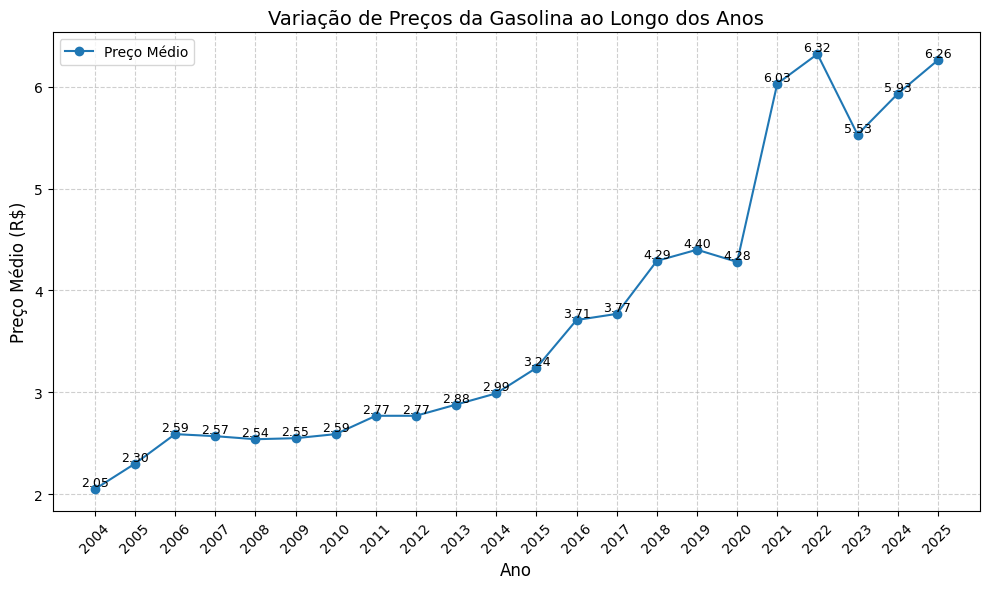

In [24]:
df_agg = df_anp_valor.groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)

# Filtrando apenas os dados do produto "gasolina"
df_gasolina = df_agg.loc['Gasolina']  # Seleciona apenas a linha onde o produto é gasolina

# Criando o gráfico de linhas para os preços médios ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(df_gasolina.index, df_gasolina[('preco_venda', 'mean')], marker='o', label='Preço Médio')

# Adicionando os valores em cada ponto do gráfico
for x, y in zip(df_gasolina.index, df_gasolina[('preco_venda', 'mean')]):
    plt.text(x, y, f'{y:.2f}', fontsize=9, ha='center', va='bottom')

# Adicionando título e rótulos
plt.title('Variação de Preços da Gasolina ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(df_gasolina.index, rotation=45)  # Rotaciona os anos no eixo X para melhor visualização

# Exibindo o gráfico
plt.tight_layout()
plt.show()